In [57]:
from collections import namedtuple

from aocd.models import Puzzle
import dotenv
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

dotenv.load_dotenv();

In [2]:
Coords = namedtuple("Coords", ["x", "y"])
Line = namedtuple("Line", ["start", "stop"])

In [3]:
def parse_coord(coord):
    x, y = coord.split(",")
    return [int(x), int(y)]

In [4]:
def parse_line(line):
    start, stop = line.split(" -> ")
    return [parse_coord(start), parse_coord(stop)]

In [6]:
def is_orthogonal(line):
    return (line[0] == line[1]).any()

In [65]:
def plot_seabed(seabed, suptitle=None):
    fig, axes = plt.subplots(ncols=3, figsize=(24, 8))
    subsets = {
        "full": seabed,
        "danger zones": seabed > 1,
        "danger details": seabed * (seabed > 1),
    }
    for ax, (title, subset) in zip(axes, subsets.items()):
        im = ax.imshow(subset)
        ax.set(title=title)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)
    if suptitle:
        fig.suptitle(suptitle)
    fig.tight_layout()

In [50]:
puzzle = Puzzle(2021, 5)
data = np.array([parse_line(line) for line in puzzle.input_data.splitlines()])
data[:3]

array([[[959, 103],
        [139, 923]],

       [[899,  63],
        [899,  53]],

       [[591, 871],
        [364, 644]]])

In [51]:
max_x = data[:, :, 0].max() + 1
max_y = data[:, :, 1].max() + 1
max_x, max_y

(991, 991)

In [52]:
seabed = np.zeros((max_x, max_y))
for line in data:
    if not is_orthogonal(line):
        continue
    (start_x, start_y), (stop_x, stop_y) = line
    dir_x = np.sign(stop_x - start_x) or 1
    dir_y = np.sign(stop_y - start_y) or 1
    
    inds_x = np.arange(start_x, stop_x + dir_x, dir_x)
    inds_y = np.arange(start_y, stop_y + dir_y, dir_y)
    seabed[(inds_x, inds_y)] += 1
    
puzzle.answer_a = len(seabed[seabed > 1])

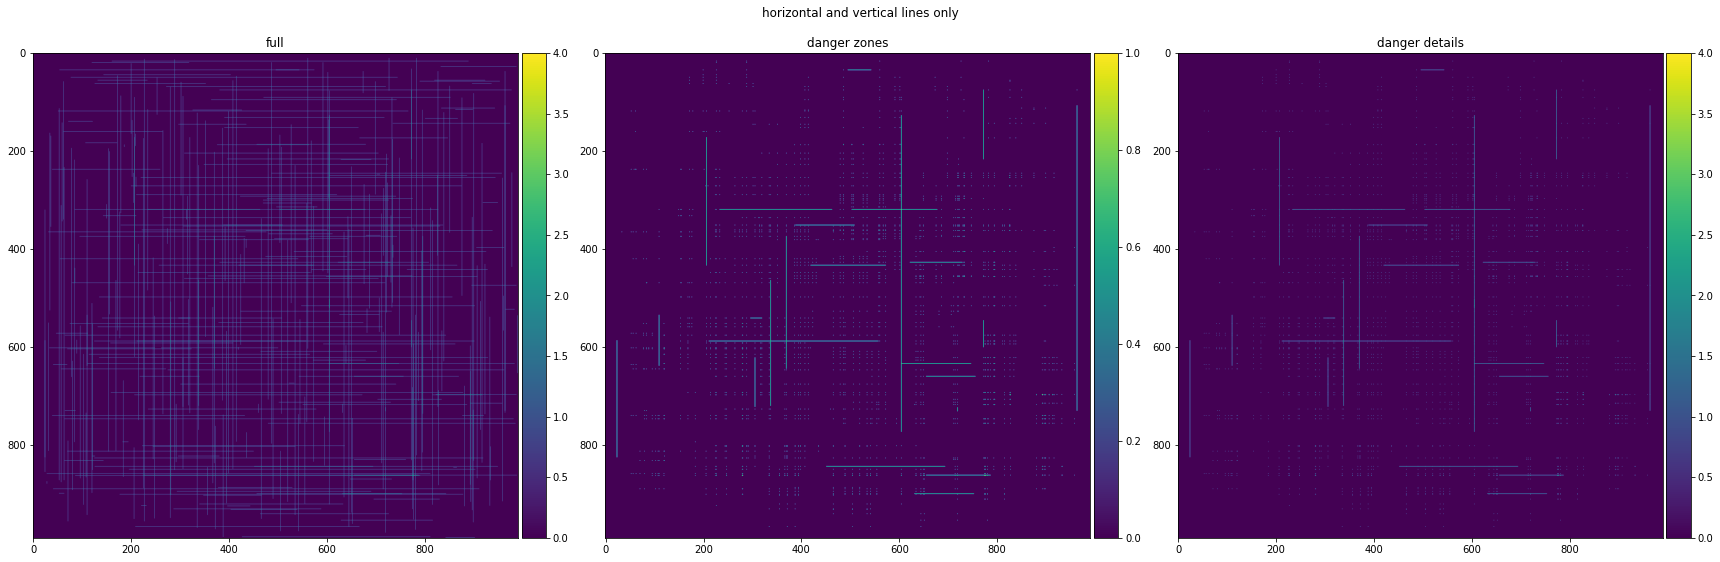

In [66]:
plot_seabed(seabed, suptitle="horizontal and vertical lines only")

In [68]:
seabed = np.zeros((max_x, max_y))
for line in data:
    (start_x, start_y), (stop_x, stop_y) = line
    dir_x = np.sign(stop_x - start_x) or 1
    dir_y = np.sign(stop_y - start_y) or 1
    
    inds_x = np.arange(start_x, stop_x + dir_x, dir_x)
    inds_y = np.arange(start_y, stop_y + dir_y, dir_y)
    seabed[(inds_x, inds_y)] += 1
    
puzzle.answer_b = len(seabed[seabed > 1])

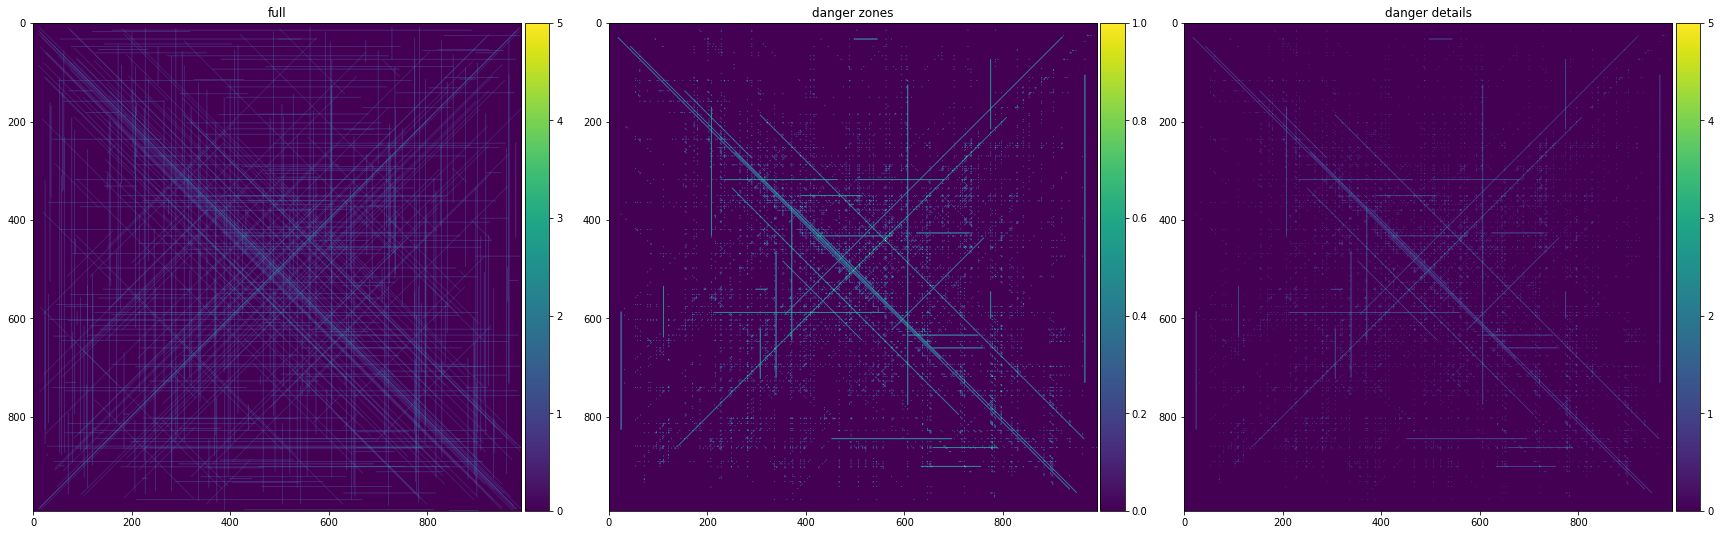

In [69]:
plot_seabed(seabed)